In [159]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import linprog
import IESDS
import order_k
import BFPSNS
import Linear_programming
import support_enumeration as se

import nashpy as nash


## 1.

In [160]:
# Parametre
c_1 = 1/10
c_2 = 2/10

def price(qi, qj):
    return 1 / np.sqrt(qi + qj)

def profit(qi, qj, c):
    return (price(qi, qj,) - c) * qi

# Eksempel på simultant prisvektor (startværdi)
q0 = np.array([0.5, 0.5])

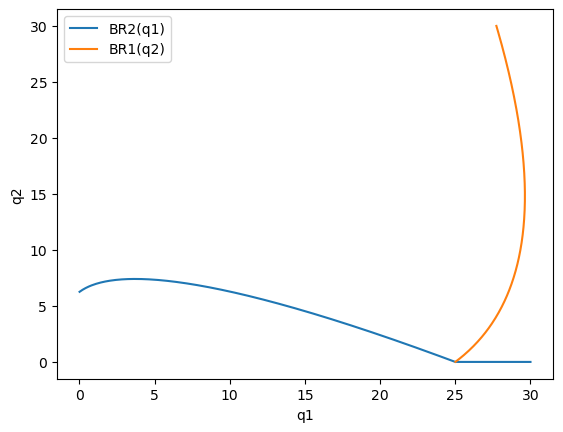

Nash-mængder: q1* ≈ 25.0000, q2* ≈ 0.0000
Profit firma 1: π1* ≈ 2.5000
Profit firma 2: π2* ≈ 0.0000


In [161]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, fsolve
from scipy.optimize import minimize_scalar, root

# Firma 2’s best–response: maksimer over q2 givet q1
def BR1(q2, c=c_1):
    res = minimize_scalar(lambda q1: -profit(q1, q2, c),
                          bounds=(0, 30), method='bounded', options={'xatol':1e-8})
    return res.x

def BR2(q1, c=c_2):
    res = minimize_scalar(lambda q2: -profit(q2, q1, c),
                          bounds=(0, 30), method='bounded', options={'xatol':1e-8})
    return res.x

# Tegn BR-kurver
qq = np.linspace(0.01, 30, 300)
qq1 = np.array([BR1(q) for q in qq])
qq2 = np.array([BR2(q) for q in qq])

plt.plot(qq, qq2, label='BR2(q1)')
plt.plot(qq1, qq, label='BR1(q2)')
plt.legend()
plt.xlabel('q1')
plt.ylabel('q2')
plt.show()

# Løs systemet q1 = BR1(q2), q2 = BR2(q1)
def eq1(vars):
    q1, q2 = vars
    return q1 - BR1(q2)   # q1 = BR1(q2)

def eq2(vars):
    q1, q2 = vars
    return q2 - BR2(q1)   # q2 = BR2(q1)

# find (q1*, q2*) with fsolve på det samlede system
q1_star, q2_star = fsolve(lambda x: [eq1(x), eq2(x)], [0.5, 0.5])

print(f"Nash-mængder: q1* ≈ {q1_star:.4f}, q2* ≈ {q2_star:.4f}")
print(f"Profit firma 1: π1* ≈ {profit(q1_star, q2_star, c_1):.4f}")
print(f"Profit firma 2: π2* ≈ {profit(q2_star, q1_star, c_2):.4f}")


## 2.

[24.99934882  0.        ]


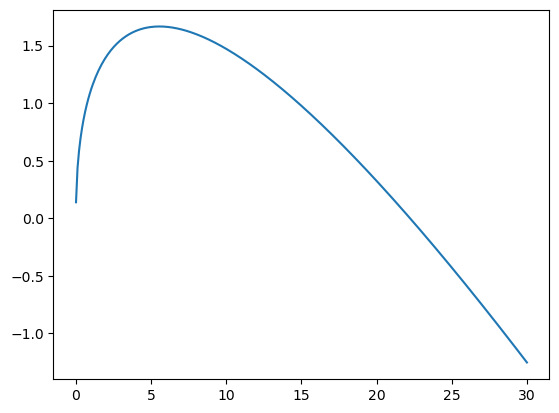

In [162]:
def cartel_profit_a(x):
    q1, q2 = x
    return profit(q1, q2, c = c_1) + profit(q2, q1, c=c_2)

f = lambda x : -cartel_profit_a(x)
res_a = minimize(f, q0, bounds=[(0, None), (0, None)])

print(res_a.x)

qq = np.linspace(0.01, 30, 300)

cartel_profit = np.array([cartel_profit_a((q1, q2)) for q1, q2 in zip(qq, qq)])
plt.plot(qq, cartel_profit, label='Cartel Profit')


## 3.

In [167]:
#Profit i samarbejdsstadiet
pi_C = profit(24.999,0, c=c_1)
print(pi_C)

#Profit i nashstadiet
pi_NE = profit(25,0, c=c_1)
print(pi_NE)

#Profit i afvigelse for demand function a
from scipy.optimize import minimize_scalar

q_c = 25

res_hat = minimize_scalar(
    lambda q: -profit(qi=q, qj=q_c, c=c_1),
    bounds=(0, 30),
    method='bounded'
)
print("Optimal price ved afvigelse:", res_hat.x)
pi_hat = profit(res_hat.x, qj=0, c=c_1)
pi_hat2 = profit(0, qj=res_hat.x, c=c_2)
print("Optimal pi ved afvigelse:", pi_hat)
print("Optimal pi ved afvigelse:", pi_hat2)

minimum_delta = (pi_hat-pi_C)/(pi_hat-pi_NE)
print("Minimum delta for cooperation:", minimum_delta)

2.4999999989999804
2.5
Optimal price ved afvigelse: 28.697475856286644
Optimal pi ved afvigelse: 2.4872549210243466
Optimal pi ved afvigelse: -0.0
Minimum delta for cooperation: 0.9999999215368045


## 4.

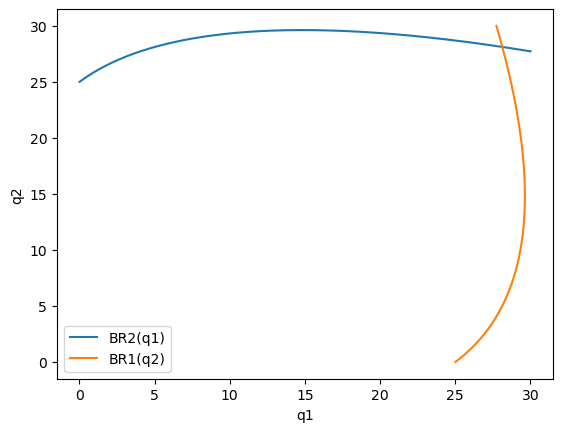

Nash-mængder: q1* ≈ 28.1250, q2* ≈ 28.1250
Profit firma 1: π1* ≈ 0.9375
Profit firma 2: π2* ≈ 0.9375


C:\Users\elias\AppData\Local\Temp\ipykernel_42736\3901215535.py:6: RuntimeWarning: invalid value encountered in sqrt
  return 1 / np.sqrt(qi + qj)


In [168]:
c_1 = 1/10
c_2 = 1/10

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, fsolve
from scipy.optimize import minimize_scalar, root

# Firma 2’s best–response: maksimer over q2 givet q1
def BR1(q2, c=c_1):
    res = minimize_scalar(lambda q1: -profit(q1, q2, c),
                          bounds=(0, 30), method='bounded', options={'xatol':1e-8})
    return res.x

def BR2(q1, c=c_2):
    res = minimize_scalar(lambda q2: -profit(q2, q1, c),
                          bounds=(0, 30), method='bounded', options={'xatol':1e-8})
    return res.x

# Tegn BR-kurver
qq = np.linspace(0.01, 30, 300)
qq1 = np.array([BR1(q) for q in qq])
qq2 = np.array([BR2(q) for q in qq])

plt.plot(qq, qq2, label='BR2(q1)')
plt.plot(qq1, qq, label='BR1(q2)')
plt.legend()
plt.xlabel('q1')
plt.ylabel('q2')
plt.show()

# Løs systemet q1 = BR1(q2), q2 = BR2(q1)
def eq1(vars):
    q1, q2 = vars
    return q1 - BR1(q2)   # q1 = BR1(q2)

def eq2(vars):
    q1, q2 = vars
    return q2 - BR2(q1)   # q2 = BR2(q1)

# find (q1*, q2*) with fsolve på det samlede system
q1_star, q2_star = fsolve(lambda x: [eq1(x), eq2(x)], [0.5, 0.5])

print(f"Nash-mængder: q1* ≈ {q1_star:.4f}, q2* ≈ {q2_star:.4f}")
print(f"Profit firma 1: π1* ≈ {profit(q1_star, q2_star, c_1):.4f}")
print(f"Profit firma 2: π2* ≈ {profit(q2_star, q1_star, c_2):.4f}")


In [170]:
def cartel_profit_a(x):
    q1, q2 = x
    return profit(q1, q2, c = c_1) + profit(q2, q1, c=c_2)

f = lambda x : -cartel_profit_a(x)
res_a = minimize(f, q0, bounds=[(0, None), (0, None)])

print(res_a.x)

qq = np.linspace(0.01, 30, 300)

cartel_profit = np.array([cartel_profit_a((q1, q2)) for q1, q2 in zip(qq, qq)])


[12.49995819 12.49995819]


In [174]:
#Profit i samarbejdsstadiet
pi_C = profit(12.49995,12.49995, c=c_1)
print(pi_C)

#Profit i nashstadiet
pi_NE = profit(28.125,28.125, c=c_1)
print(pi_NE)

#Profit i afvigelse for demand function a
from scipy.optimize import minimize_scalar

q_c = 12.49995

res_hat = minimize_scalar(
    lambda q: -profit(qi=q, qj=q_c, c=c_1),
    bounds=(0, 30),
    method='bounded'
)
print("Optimal price ved afvigelse:", res_hat.x)
pi_hat = profit(res_hat.x, qj=12.49995, c=c_1)
pi_hat2 = profit(12.49995, qj=res_hat.x, c=c_2)
print("Optimal pi ved afvigelse:", pi_hat)
print("Optimal pi ved afvigelse:", pi_hat2)

minimum_delta = (pi_hat-pi_C)/(pi_hat-pi_NE)
print("Minimum delta for cooperation:", minimum_delta)

1.2499999999949996
0.9374999999999998
Optimal price ved afvigelse: 29.565371625755112
Optimal pi ved afvigelse: 1.601955240643773
Optimal pi ved afvigelse: 0.6772910100288212
Minimum delta for cooperation: 0.5296899160698518


## 5.

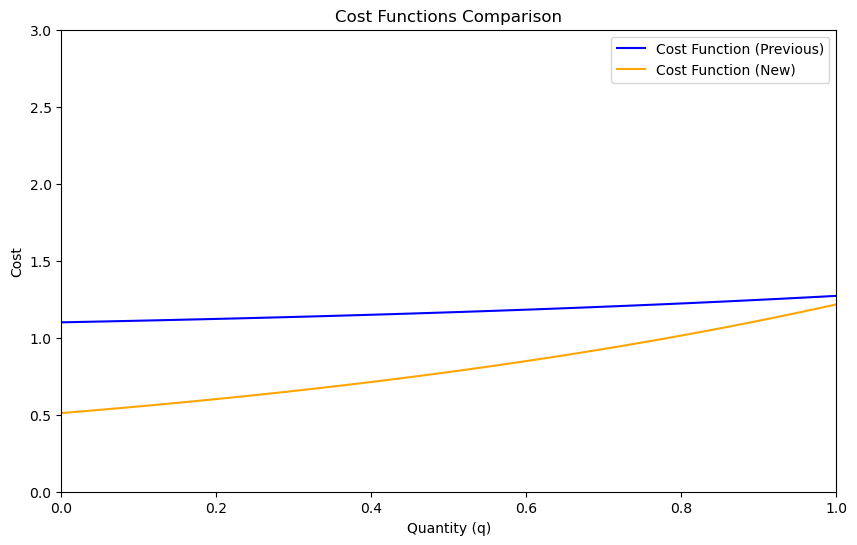

In [ ]:
def cost_prev(q):
    return 1 + (1/10) * np.exp(q)

def cost_new(q):
    return (1/10) + 0.4108 * np.exp(q)

#plotting cost functions
q_values = np.linspace(0, 1, 100)
plt.figure(figsize=(10, 6))
plt.plot(q_values, cost_prev(q_values), label='Cost Function (Previous)', color='blue')
plt.plot(q_values, cost_new(q_values), label='Cost Function (New)', color='orange')
plt.title('Cost Functions Comparison')
plt.xlabel('Quantity (q)')
plt.ylabel('Cost')
plt.xlim(0, 1)
plt.ylim(0, 3)
plt.legend()
plt.show()